### Load and Inspect the Data

In [1]:
import pandas as pd

# Load the dataset with a different encoding
data = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')

# Check the first few rows to confirm
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,9/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,2,CA-2013-152156,9/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,14,CA-2013-161389,6/12/2013,11/12/2013,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,98103,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922
3,36,CA-2013-117590,9/12/2013,11/12/2013,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
4,37,CA-2013-117590,9/12/2013,11/12/2013,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630


In [2]:
# Check for missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2650 non-null   int64  
 1   Order ID       2650 non-null   object 
 2   Order Date     2650 non-null   object 
 3   Ship Date      2650 non-null   object 
 4   Ship Mode      2650 non-null   object 
 5   Customer ID    2650 non-null   object 
 6   Customer Name  2650 non-null   object 
 7   Segment        2650 non-null   object 
 8   Country        2650 non-null   object 
 9   City           2650 non-null   object 
 10  State          2650 non-null   object 
 11  Postal Code    2650 non-null   int64  
 12  Region         2650 non-null   object 
 13  Product ID     2650 non-null   object 
 14  Category       2650 non-null   object 
 15  Sub-Category   2650 non-null   object 
 16  Product Name   2650 non-null   object 
 17  Sales          2650 non-null   float64
 18  Quantity

### Preprocess the Data

In [3]:
# Convert 'Order Date' column to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract Year, Month, and Day
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.day

# Check the cleaned data
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day
0,1,CA-2013-152156,2013-09-11,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,2013,9,11
1,2,CA-2013-152156,2013-09-11,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,2013,9,11
2,14,CA-2013-161389,2013-06-12,11/12/2013,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,2013,6,12
3,36,CA-2013-117590,2013-09-12,11/12/2013,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737,2013,9,12
4,37,CA-2013-117590,2013-09-12,11/12/2013,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630,2013,9,12


### Visualize the Data

#### 1. Total Sales per Year

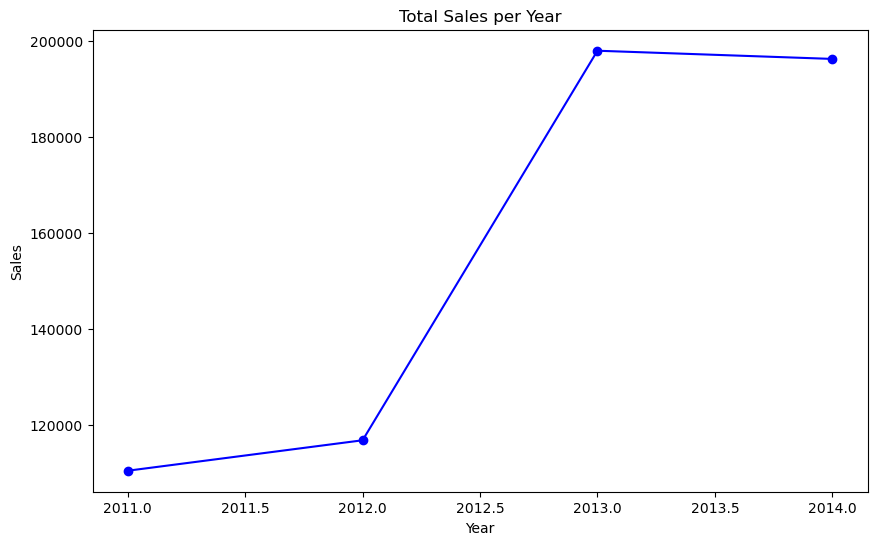

In [13]:
import matplotlib.pyplot as plt

# Total Sales per Year
total_sales_per_year = data.groupby('Year')['Sales'].sum().reset_index()

# Plot Total Sales per Year (Line Chart)
plt.figure(figsize=(10, 6))
plt.plot(total_sales_per_year['Year'], total_sales_per_year['Sales'], marker='o', color='b')
plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

#### Total Sales by Region

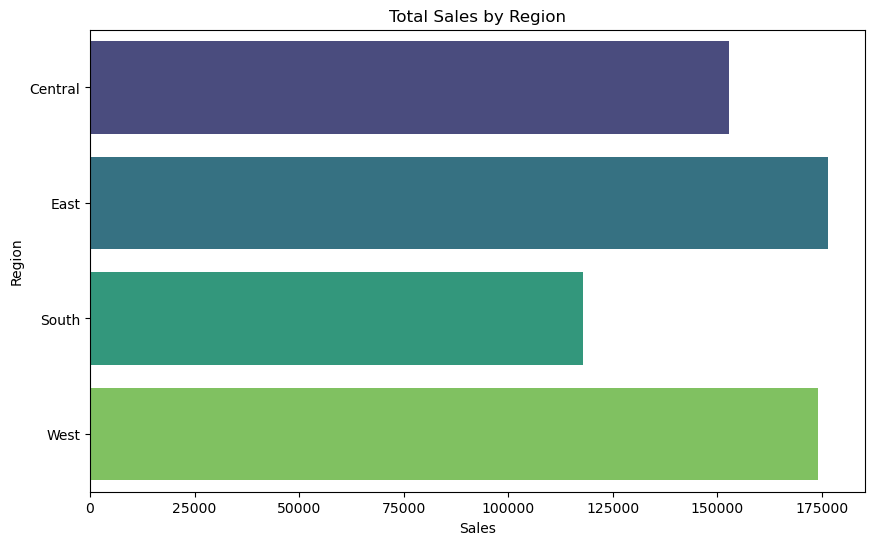

In [14]:
import seaborn as sns

# Total Sales by Region
sales_by_region = data.groupby('Region')['Sales'].sum().reset_index()

# Plot Total Sales by Region (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Region', data=sales_by_region, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.show()

#### Top 10 Products by Sales

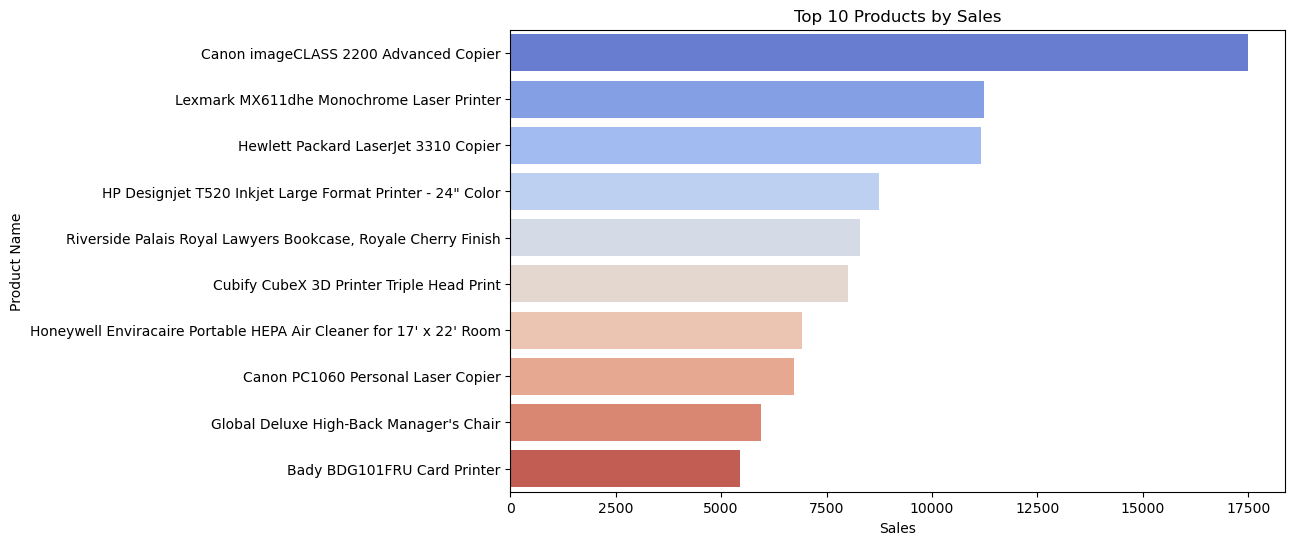

In [15]:
# Plot of Top 10 Products by Sales
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot Top 10 Products by Sales (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Product Name', data=top_products, palette='coolwarm')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

#### Sales vs Profit

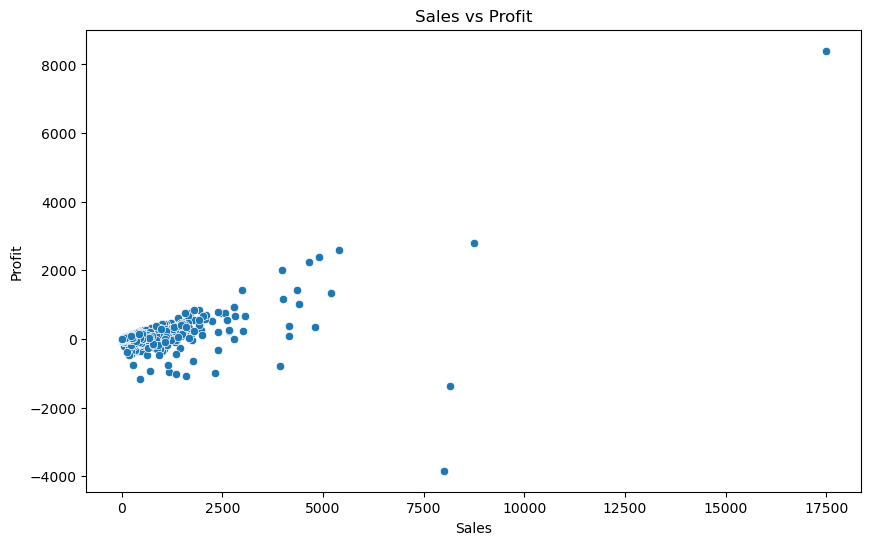

In [16]:
# Plot of Sales vs Profit 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=data)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

#### Monthly Sales Trend

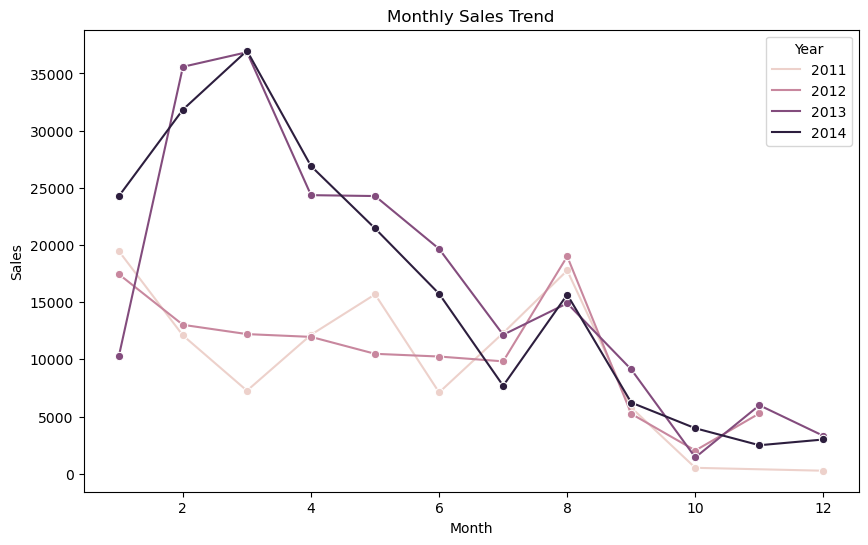

In [17]:
# Monthly Sales Trend
monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plot Monthly Sales Trend (Line Chart)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()
